#DL_NeuralNetworkSimplePerceptron_Assignment

Question 1:

What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Answer: Deep Learning (DL) is a subset of machine learning that uses deep (multi-layer) neural networks to automatically learn hierarchical representations of data from raw inputs. DL models can learn complex, often non-linear mappings between inputs and outputs by composing many simple transformations (layers).

**How it evolved (brief timeline):**

1940s–1960s: Early perceptron ideas (McCulloch-Pitts, Rosenblatt).

1980s: Backpropagation popularized (Rumelhart, Hinton, Williams) enabling training of multilayer networks.

1990s–2000s: Computational limits and limited data slowed progress; Support Vector Machines / tree methods dominated many tasks.

2010s onward: Availability of large datasets, GPUs, new architectures (CNNs, RNNs, Transformers) and algorithmic advances (ReLU, better optimizers) caused DL breakthroughs (image recognition, speech, NLP).

**How DL differs from traditional ML**

Representation learning vs feature engineering: DL learns layered feature representations automatically; traditional ML (e.g., SVM, Random Forest) typically relies on human-designed features.

Scale and compute: DL benefits strongly from large data and GPUs; traditional ML often performs well in small-data regimes.

End-to-end learning: DL can map raw inputs (images, audio, text) directly to targets. Traditional ML often needs preprocessing pipelines.

Model complexity & interpretability: DL models have many parameters and are less interpretable; traditional methods are often simpler and easier to inspect.

Performance trade-offs: DL typically outperforms others on perceptual tasks (vision, speech, text) but is more resource-intensive.

Question 2:

Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Answer: A perceptron is the simplest form of an artificial neural network and works as a binary classifier. It takes multiple inputs, assigns weights to them, adds a bias, and passes the result through an activation function to produce an output of either 0 or 1. In training, the perceptron adjusts its weights and bias whenever it makes an incorrect prediction. Over time, it learns to separate the two classes correctly if they are linearly separable.

Its main limitation is that it can only solve problems where the data can be separated by a straight line or hyperplane. It cannot solve more complex problems such as the XOR logic gate. Additionally, the step activation function it originally used is not differentiable, which makes it unsuitable for training deeper networks.

Question 3:

Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Answer: Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns instead of just straight-line relationships. Without activation functions, neural networks would behave like simple linear models.

- The Sigmoid function maps input values to a range between 0 and 1, making it useful for probabilities. However, it suffers from vanishing gradients and is not zero-centered.

- The Tanh function maps values to a range between -1 and 1. It is zero-centered and works better than Sigmoid in practice, but it also faces the vanishing gradient problem for very large or very small inputs.

- The ReLU function outputs zero for negative inputs and returns the same value for positive inputs. It is simple and efficient, helps avoid vanishing gradients in many cases, and is the most widely used activation function in modern networks. Its drawback is that some neurons can become inactive permanently, known as the “dying ReLU” problem

Question 4:

What is the difference between Loss function and Cost function in neural networks? Provide examples.

Answer: A loss function measures the error for a single training example. It tells us how far the prediction of the network is from the true value for that one sample. A cost function, on the other hand, is the average or total of all the loss values across the entire dataset or a batch of samples.
In simple terms, the loss function looks at one data point, while the cost function gives the overall measure of performance across many data points. For example, when predicting house prices, the loss is the error for one house, while the cost is the average error across all houses in the dataset.

Question 5:

What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

(Use NumPy, Matplotlib, and TensorFlow/Keras for implementation)

Answer: Optimizers are algorithms that adjust the weights of a neural network during training to minimize the cost function and improve accuracy. They decide how the weights should change based on the gradients.

- Gradient Descent is the basic method where weights are updated in the opposite direction of the error gradient. It is simple but can be slow and sensitive to the learning rate.

- RMSprop is an improvement that adapts the learning rate for each parameter by considering recent squared gradients. It is particularly effective for non-stationary problems and often used in recurrent networks.

- Adam combines the ideas of momentum and RMSprop. It keeps track of both the average gradient and the average of squared gradients, making it faster and more efficient in practice. Adam is widely used as a default optimizer for many deep learning tasks.





Question 6:

Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.

(Include your Python code and output in the code box below.)

Answer: We implement a perceptron with two inputs and a bias and train with the perceptron update rule. For the AND gate, expected outputs:
[
0
,
0
,
0
,
1
]
[0,0,0,1] for inputs
[
00
,
01
,
10
,
11
]
[00,01,10,11]



In [1]:
import numpy as np

# AND dataset
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])

class Perceptron:
    def __init__(self, input_dim, lr=0.2, epochs=20):
        self.w = np.zeros(input_dim)
        self.b = 0.0
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return np.where(x >= 0.0, 1, 0)

    def predict(self, X):
        return self.activation(X.dot(self.w) + self.b)

    def fit(self, X, y):
        history = []
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                if update != 0:
                    self.w += update * xi
                    self.b += update
            history.append(np.mean(self.predict(X) == y))
        return history

perc = Perceptron(input_dim=2)
history = perc.fit(X_and, y_and)
print("Weights:", perc.w, "Bias:", perc.b)
print("Predictions:", perc.predict(X_and))
print("Target   :", y_and)
print("Training acc history:", history)


Weights: [0.4 0.2] Bias: -0.4000000000000001
Predictions: [0 0 0 1]
Target   : [0 0 0 1]
Training acc history: [np.float64(0.25), np.float64(0.5), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


Question 7:

Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib:
(Include your Python code and output in the code box below.)

Answer:



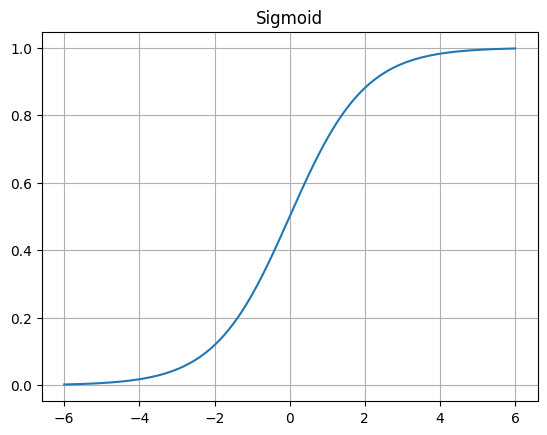

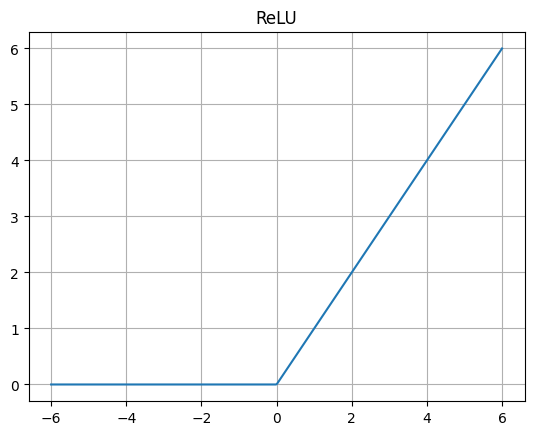

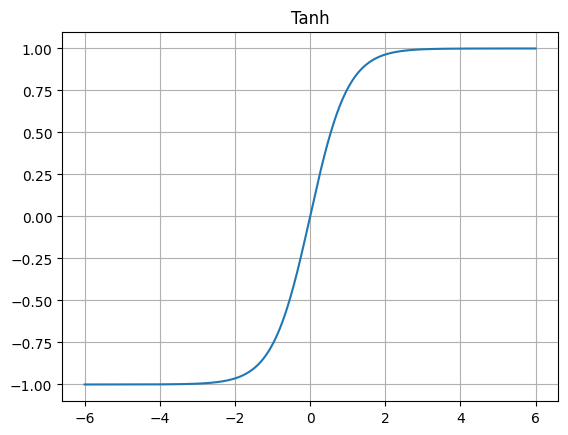

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1/(1+np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)

x = np.linspace(-6, 6, 400)
plt.figure(); plt.plot(x, sigmoid(x)); plt.title("Sigmoid"); plt.grid(True); plt.show()
plt.figure(); plt.plot(x, relu(x)); plt.title("ReLU"); plt.grid(True); plt.show()
plt.figure(); plt.plot(x, tanh(x)); plt.title("Tanh"); plt.grid(True); plt.show()


Question 8:

Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.
(Include your Python code and output in the code box below.)

Answer: What to expect: A simple MLP (Flatten → Dense 128 ReLU → Dense 10 softmax). Print training accuracy (last epoch).

Rationale: MLP is sufficient for the assignment; for higher accuracy you'd use CNNs.



In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Final training accuracy:", history.history['accuracy'][-1])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8238 - loss: 0.6454 - val_accuracy: 0.9552 - val_loss: 0.1655
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9454 - loss: 0.1880 - val_accuracy: 0.9653 - val_loss: 0.1237
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9625 - loss: 0.1330 - val_accuracy: 0.9702 - val_loss: 0.1033
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.1028 - val_accuracy: 0.9755 - val_loss: 0.0878
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0817 - val_accuracy: 0.9765 - val_loss: 0.0836
Final training accuracy: 0.9772037267684937


Question 9:

Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.
(Include your Python code and output in the code box below.)

Answer: Train the same MLP (or small CNN) on Fashion MNIST and plot loss and accuracy (train vs val) across epochs to interpret overfitting/underfitting.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7448 - loss: 0.7535 - val_accuracy: 0.8462 - val_loss: 0.4418
Epoch 2/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8540 - loss: 0.4127 - val_accuracy: 0.8583 - val_loss: 0.3910
Epoch 3/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8699 - loss: 0.3662 - val_accuracy: 0.8672 - val_loss: 0.3855
Epoch 4/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8791 - loss: 0.3387 - val_accuracy: 0.8747 - val_loss: 0.3491
Epoch 5/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8847 - loss: 0.3176 - val_accuracy: 0.8753 - val_loss: 0.3383
Epoch 6/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8911 - loss: 0.3005 - val_accuracy: 0.8803 - val_loss: 0.3243
Epoch 7/8
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

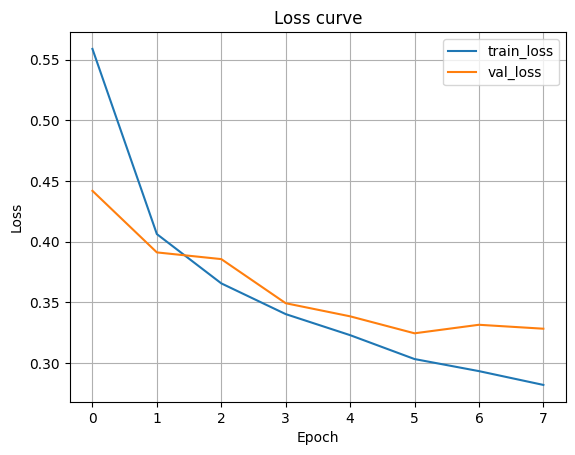

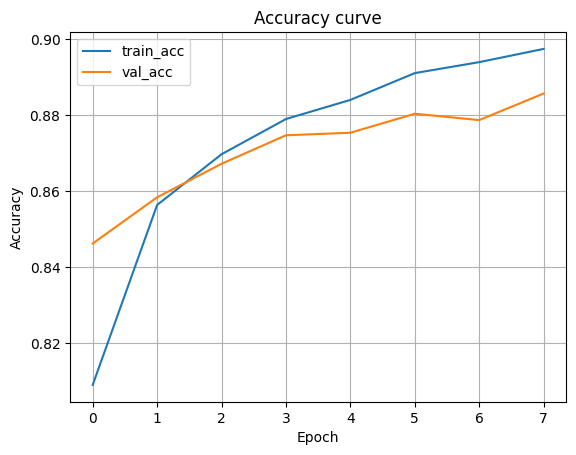

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=8, batch_size=128, validation_split=0.1)

# Plot loss
plt.figure();
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title("Loss curve"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True); plt.show()

# Plot accuracy
plt.figure();
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.title("Accuracy curve"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True); plt.show()

Question 10:

You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.
Explain your real-time data science workflow:
- How would you design a deep learning model (perceptron or multilayer NN)?
- Which activation function and loss function would you use, and why?
- How would you train and evaluate the model, considering class imbalance?
- Which optimizer would be suitable, and how would you prevent overfitting?
(Include your Python code and output in the code box below.)

Answer:

This is a long, practical question. I'll break it into design choices, why, training/evaluation strategies for imbalance, production considerations, and then provide runnable demo code (a synthetic dataset and a Keras model with embeddings). Note: I could not run the Keras demo in this environment (no TensorFlow), but the code is fully runnable in Colab/local env.

(A) Real-time data science workflow (end-to-end)

Data ingestion (real-time): Stream transactions into a message queue (Kafka) or streaming source. Store raw events in a data lake for offline analysis. Use a stream processor (Flink / Spark Streaming) for feature calculation in near real-time.

Feature engineering / feature store: Keep online (low-latency) features in a Feature Store (Feast) for serving at inference time (e.g., sliding-window transaction counts, avg amount per merchant/customer, velocity features).

Labeling & training data: Collect ground-truth labels (fraud confirmed) from downstream systems, customer disputes, chargebacks. Build training sets with timestamp-awareness to avoid leakage.

Model design & training: Train offline on balanced or re-weighted data using embeddings for high-cardinality categorical features (merchant ID, location) and numeric features normalized. Use class weighting or specialized loss (focal loss) to handle imbalance.

Evaluation: Evaluate with precision, recall, F1, PR-AUC (precision-recall area is more informative for imbalanced data than ROC-AUC). Monitor false positives cost vs false negative cost — important for banking.

Serving & latency: Serve model with TensorFlow Serving / Triton / FastAPI depending on inference SLA. Provide both batch and online evaluation endpoints.

Monitoring & retraining: Monitor data drift, feature drift, model performance (precision/recall). Retrain periodically (or use streaming updates) and use canary deployments with human-in-the-loop verification for new models.

Compliance & privacy: Ensure PII protection and auditability. Use secure enclaves and logging for model decisions.

(B) Model design (Perceptron vs Multilayer NN)

For this problem a multilayer neural network is preferable: it can combine numeric features and embeddings (for merchant, location) and learn non-linear interactions (amount × merchant patterns).

Example architecture:

Inputs: scaled numeric features (amount, hour, etc.) + embedding vectors for categorical fields (merchant_id, customer_location).

Concatenate → Dense(128, ReLU) → BatchNorm → Dropout → Dense(64, ReLU) → Dropout → Dense(1, Sigmoid).

(C) Activation & loss functions — choices & why

Hidden activations: ReLU (or LeakyReLU) — fast convergence, sparse activations.

Output activation: Sigmoid (because binary classification).

Loss function: binary_crossentropy as baseline. For strong class imbalance consider focal loss (reduces the loss contribution from easy negatives) or sample/class weight adjustments.

(D) Training/evaluation with class imbalance

Class weighting: Compute inverse-frequency class weights and pass to fit(class_weight=...).

Resampling: Oversample minority (SMOTE) or undersample majority for some models (but careful with leakage).

Evaluation metrics: Precision, Recall, F1, PR-AUC, ROC-AUC; prioritize recall (catching fraud) or precision (reducing false alerts) based on business rules.

Cross-validation / time-based splits: Use time-based validation (train on older data, validate on newer) to avoid lookahead bias.

(E) Optimizer & overfitting prevention

Optimizer: Adam (good default), consider AdamW (Adam + decoupled weight decay) for better regularization.

Regularization: Dropout, L2 weight decay, batch normalization, early stopping on validation metric, and data augmentation/feature noise if applicable.

Monitoring: Track business KPIs (false alert rate, detection rate) not just loss.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ merchant_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loc_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │     25,000 │ merchant_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 10)     │        500 │ loc_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 10)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 63)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      8,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,525 (166.11 KB)

 Trainable params: 42,269 (165.11 KB)

 Non-trainable params: 256 (1.00 KB)

Class weights: {np.int64(0): 0.5102040816326531, np.int64(1): 25.0}
Epoch 1/6
57/57 - 11s - 192ms/step - auc: 0.9577 - loss: 0.2426 - val_auc: 0.9858 - val_loss: 0.4410
Epoch 2/6
57/57 - 0s - 6ms/step - auc: 0.9712 - loss: 0.1497 - val_auc: 0.9856 - val_loss: 0.3698
Epoch 3/6
57/57 - 0s - 5ms/step - auc: 0.9838 - loss: 0.1234 - val_auc: 0.9928 - val_loss: 0.2806
Epoch 4/6
57/57 - 0s - 5ms/step - auc: 0.9888 - loss: 0.1061 - val_auc: 0.9960 - val_loss: 0.1901
Epoch 5/6
57/57 - 0s - 7ms/step - auc: 0.9980 - loss: 0.0636 - val_auc: 0.9947 - val_loss: 0.0963
Epoch 6/6
57/57 - 0s - 5ms/step - auc: 0.9992 - loss: 0.0450 - val_auc: 0.9945 - val_loss: 0.0509
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3920
           1       0.97      0.85      0.91        80

    accuracy                           1.00      4000
   macro avg       0.98      0.92      0.95      4000
weighted avg       1.00     

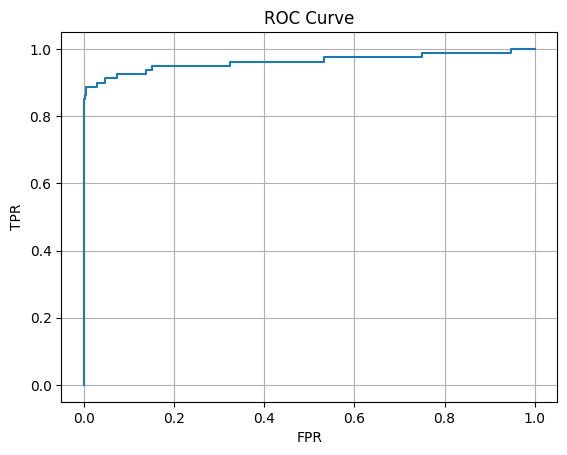

In [5]:
# Q10: Synthetic fraud pipeline demo (runnable in Colab / local env with tensorflow)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1) Create synthetic imbalanced dataset
rng = np.random.RandomState(42)
n_samples = 20000
fraud_ratio = 0.02
n_fraud = int(n_samples * fraud_ratio)
n_legit = n_samples - n_fraud

amount_legit = np.abs(rng.normal(loc=50, scale=30, size=n_legit))
amount_fraud = np.abs(rng.normal(loc=400, scale=200, size=n_fraud))
amount = np.concatenate([amount_legit, amount_fraud])

n_merchants = 500
n_locations = 50
merchant_ids = np.concatenate([
    rng.randint(0, n_merchants, size=n_legit),
    rng.randint(0, n_merchants, size=n_fraud)
])
locations = np.concatenate([
    rng.randint(0, n_locations, size=n_legit),
    rng.randint(0, n_locations, size=n_fraud)
])

hour = rng.randint(0,24,size=n_samples)
cust_age = np.abs(rng.normal(40,12,size=n_samples))
y = np.concatenate([np.zeros(n_legit), np.ones(n_fraud)]).astype(int)

perm = rng.permutation(n_samples)
amount = amount[perm]; merchant_ids = merchant_ids[perm]; locations = locations[perm]
hour = hour[perm]; cust_age = cust_age[perm]; y = y[perm]

df = pd.DataFrame({
    'amount': amount,
    'merchant_id': merchant_ids.astype(str),
    'location': locations.astype(str),
    'hour': hour,
    'cust_age': cust_age,
    'label': y
})

# 2) Split & preprocess
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
numeric_cols = ['amount','hour','cust_age']
scaler = StandardScaler().fit(train_df[numeric_cols])
X_train_num = scaler.transform(train_df[numeric_cols])
X_test_num  = scaler.transform(test_df[numeric_cols])

le_merchant = LabelEncoder().fit(train_df['merchant_id'])
le_loc = LabelEncoder().fit(train_df['location'])
X_train_merchant = le_merchant.transform(train_df['merchant_id'])
X_test_merchant  = le_merchant.transform(test_df['merchant_id'])
X_train_loc = le_loc.transform(train_df['location'])
X_test_loc  = le_loc.transform(test_df['location'])

y_train = train_df['label'].values
y_test  = test_df['label'].values

# 3) Build Keras model with embedding for merchant and location
inp_num = layers.Input(shape=(len(numeric_cols),), name='numeric_input')
inp_merchant = layers.Input(shape=(1,), dtype='int32', name='merchant_input')
inp_loc = layers.Input(shape=(1,), dtype='int32', name='loc_input')

merchant_vocab = len(le_merchant.classes_)
loc_vocab = len(le_loc.classes_)

emb_m = layers.Embedding(input_dim=merchant_vocab, output_dim=min(50,(merchant_vocab+1)//2))(inp_merchant)
emb_m = layers.Flatten()(emb_m)
emb_l = layers.Embedding(input_dim=loc_vocab, output_dim=min(10,(loc_vocab+1)//2))(inp_loc)
emb_l = layers.Flatten()(emb_l)

x = layers.Concatenate()([inp_num, emb_m, emb_l])
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=[inp_num, inp_merchant, inp_loc], outputs=out)
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='auc')])

model.summary()

# 4) class weights and training
classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = {cls: float(w) for cls, w in zip(classes, cw)}
print("Class weights:", class_weight)

history = model.fit(
    {'numeric_input': X_train_num, 'merchant_input': X_train_merchant, 'loc_input': X_train_loc},
    y_train,
    validation_split=0.1,
    epochs=6,
    batch_size=256,
    class_weight=class_weight,
    verbose=2
)

# 5) Evaluate
preds = model.predict({'numeric_input': X_test_num, 'merchant_input': X_test_merchant, 'loc_input': X_test_loc}).ravel()
preds_label = (preds >= 0.5).astype(int)
print(classification_report(y_test, preds_label))
print("ROC AUC:", roc_auc_score(y_test, preds))
print("Confusion matrix:\n", confusion_matrix(y_test, preds_label))

# ROC plot
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure(); plt.plot(fpr, tpr); plt.title("ROC Curve"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.grid(True); plt.show()
